In [140]:
from fastai.data.block import DataBlock, MultiCategoryBlock
from fastai.vision.data import ImageBlock, get_image_files, parent_label
from fastai.vision.learner import vision_learner
from fastai.vision.all import resnet50, ClassificationInterpretation
from fastai.data.transforms import RandomSplitter
from fastai.metrics import F1ScoreMulti, partial, accuracy_multi
from torch import topk, zeros
import matplotlib.pyplot as plt

In [58]:
def label_func(x):
    label = parent_label(x)
    return [label[0],label[1]]

In [59]:
data = DataBlock(blocks=(ImageBlock, MultiCategoryBlock),
                   splitter=RandomSplitter(),
                   get_y=label_func)

In [60]:
files = get_image_files("data/generated")

In [61]:
files[0], len(files)

(Path('data/generated/fn/c0p0s1.png'), 65254)

In [62]:
dls = data.dataloaders(files)

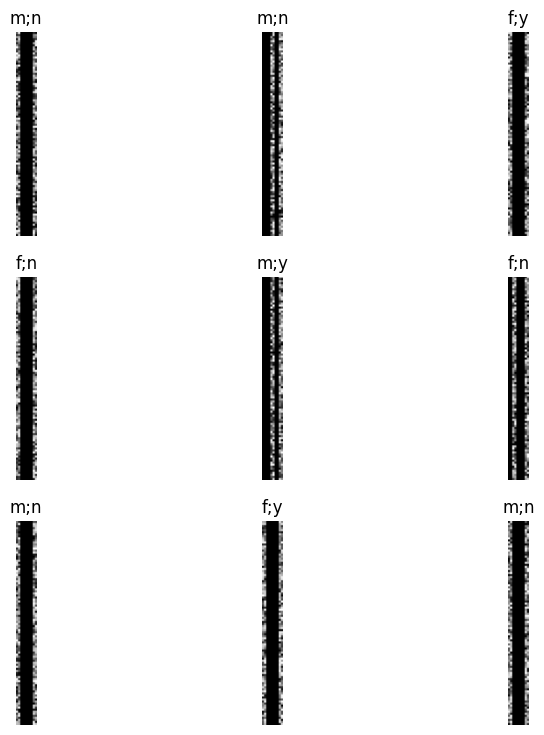

In [63]:
dls.show_batch(max_n=9)

In [64]:
f1_macro = F1ScoreMulti(thresh=0.5, average='macro')
f1_macro.name = 'f1(macro)'
f1_samples = F1ScoreMulti(thresh=0.5, average='samples')
f1_samples.name = 'f1(samples)'

learn = vision_learner(dls, resnet50, metrics=[partial(accuracy_multi, thresh=0.5), f1_macro, f1_samples])

SuggestedLRs(valley=0.0003311311302240938)

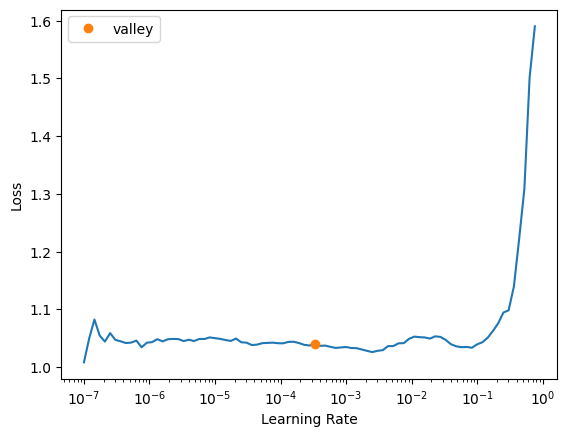

In [65]:
learn.lr_find()

In [66]:
learn.fine_tune(10, 0.009)

epoch,train_loss,valid_loss,accuracy_multi,f1(macro),f1(samples),time
0,0.650074,0.656712,0.619272,0.407214,0.619272,15:24
1,0.655472,0.662841,0.626628,0.439409,0.626628,16:11
2,0.646215,0.685852,0.628199,0.424195,0.628222,16:10
3,0.635457,0.648369,0.629770,0.418486,0.629770,15:20
4,0.644828,0.656764,0.630651,0.417702,0.630651,15:06
5,0.637759,0.731803,0.630192,0.418303,0.630192,15:01
6,0.635877,2.316735,0.626782,0.414169,0.626782,15:43
7,0.634620,0.816786,0.626207,0.437785,0.626207,16:30
8,0.635128,0.752454,0.629847,0.424737,0.629847,17:01
9,0.638779,0.825725,0.630996,0.418923,0.630996,17:06


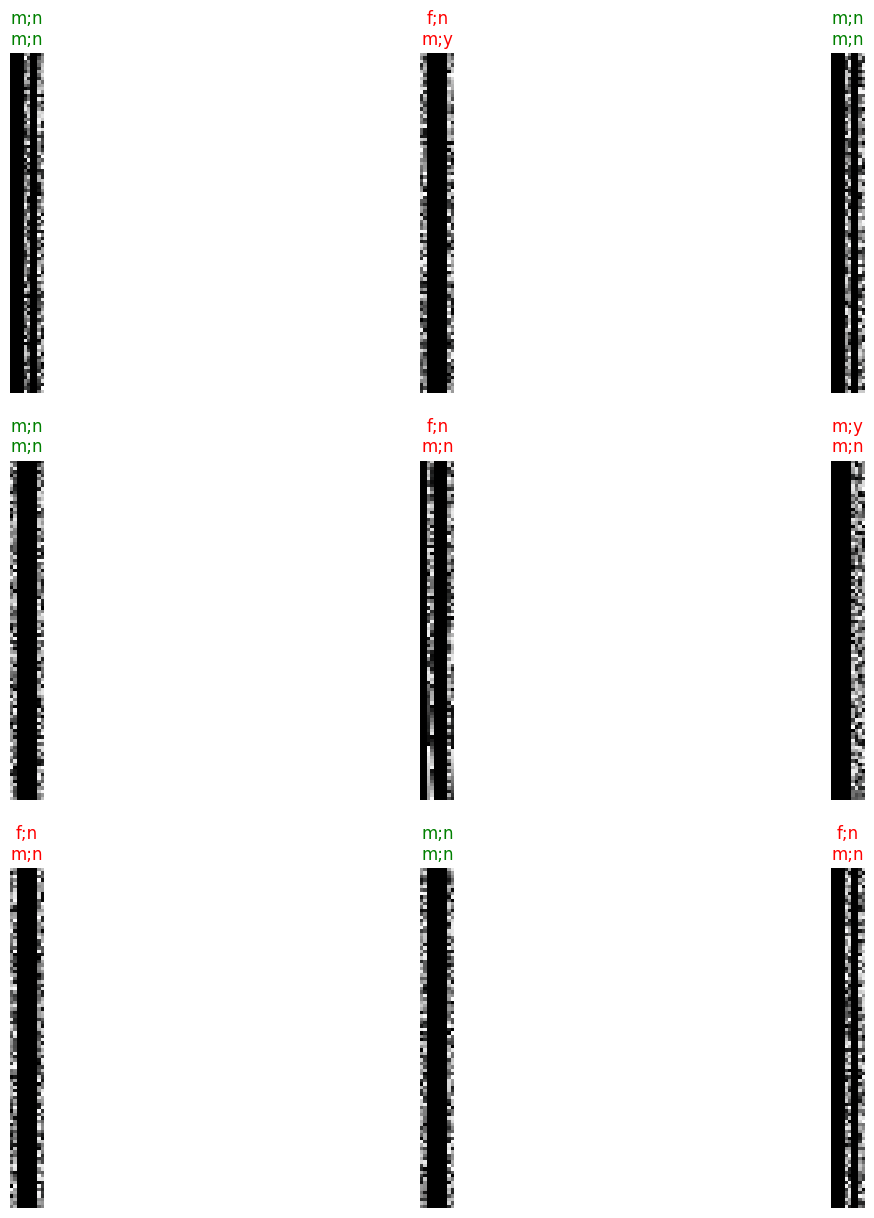

In [68]:
learn.show_results(figsize=(15,15))

In [71]:
interpretation = ClassificationInterpretation.from_learner(learn)

In [88]:

prediction = learn.get_preds(dl=dls.valid)
print(prediction)

(tensor([[0.2746, 0.7254, 0.5465, 0.4535],
        [0.2746, 0.7254, 0.5465, 0.4535],
        [0.2746, 0.7254, 0.5465, 0.4535],
        ...,
        [0.2847, 0.7153, 0.5378, 0.4622],
        [0.0000, 1.0000, 0.0000, 1.0000],
        [0.2746, 0.7254, 0.5465, 0.4535]]), tensor([[0., 1., 0., 1.],
        [0., 1., 0., 1.],
        [0., 1., 0., 1.],
        ...,
        [0., 1., 0., 1.],
        [1., 0., 0., 1.],
        [0., 1., 0., 1.]]))


In [83]:
labels = dls.valid.vocab
labels

['f', 'm', 'n', 'y']

In [138]:
actual_indices = topk(prediction[1], 2).indices
indices = topk(prediction[0], 2).indices

In [139]:
from torch import tensor


gender_cm = tensor([[0,0],
                    [0,0]])
adhd_cm = tensor([[0,0],
                  [0,0]])


for i in range(0, len(indices)):
    gender, adhd = labels[indices[i]]
    actual_gender, actual_adhd = labels[actual_indices[i]]

    print(gender, adhd, actual_gender, actual_adhd)

    g_id = 0 if gender == 'm' else 1
    ag_id = 0 if actual_gender == 'm' else 1

    a_id = 0 if adhd == 'y' else 1
    aa_id = 0 if actual_adhd == 'y' else 1

    gender_cm[g_id,ag_id] += 1
    adhd_cm[a_id,aa_id] += 1

gender_cm, adhd_cm

m n m y
m n m y
m n m y
m n m n
m n m y
m n f y
m n m y
m n m n
m n m n
m n m y
m n m y
m n m n
m n m y
m n f y
f y f y
m n m y
m n f n
m n f n
m n m y
m n f y
m n m n
m n m y
m n m n
f y f y
m n m y
m n m n
m n f n
m n f n
m n m n
m n m y
m n f n
m n f y
m n f y
m n m n
m n m n
m n m n
m n m n
m n f y
m n m n
m n m n
m n f n
m n f n
m n m n
m n m y
m n m n
m n m n
m n m y
m n f y
m n m n
m n m n
m n f n
m n m n
m n m n
m n m y
m n m y
m n m n
m n m y
m n m n
m n m n
m n m y
m n m y
m n m y
f y f y
m n m y
m n m n
m n f y
m n m n
m y m n
m n m y
m n f y
m n f y
m n m n
m n f y
m n m y
m n m y
m n m y
m n f n
m n f n
m n m y
m n m n
m n m y
m n m y
m n m n
m n m y
m n m n
m n m y
m n m n
m n f n
f y f y
m n m y
m n m n
m n f n
m n m n
m n f n
m n m n
m n m y
m n m n
m n m n
m n m y
m n f n
m n m n
m n m n
m n m y
m n m n
m n m n
m n f n
m n f y
m n m n
m n m y
m n m n
m n f n
m n m n
m n f n
m n m y
m n m n
m n m n
m n m y
m n f y
m n m n
m n m y
m n f n
m n m y
m n m y
m n m n
m n m y


(tensor([[9189, 3683],
         [   7,  171]]),
 tensor([[ 155,   16],
         [5959, 6920]]))

<Figure size 1000x700 with 0 Axes>

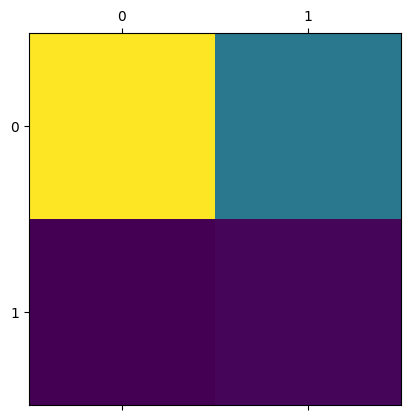

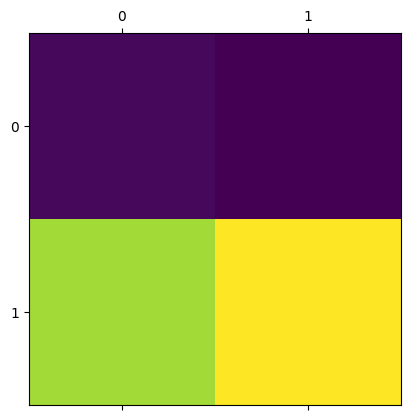

In [142]:
plt.figure(1, figsize = (10, 7))
plt.matshow(gender_cm)
plt.figure(2, figsize = (10, 7))
plt.matshow(adhd_cm)
